In [22]:
import sqlite3
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [61]:
def titlePrs(wh=''):
    dbname='movie.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from movies '+wh+' order by mday '
        res=cur.execute(sql)
        result=res.fetchall()
    return result

In [79]:
res1=titlePrs(' where mtitle="테넷" ')
#print(res1[:10])
xs=[0]
ys1=[0]
i=0
for r in res1:
    xs.append(r[6])
    ys1.append(r[3])
print(xs,ys1)

[0, 20200826, 20200827, 20200828, 20200829] [0, 1215, 1036, 759, 265]


In [82]:
res2=titlePrs(' where mtitle="반도" ')
#print(res1[:10])
xs=[]
ys2=[]
i=0
for r in res2:
    xs.append(r[6]) #날짜
    ys2.append(r[3]) #평점 수
print(xs,ys2)

[20200825, 20200826, 20200827, 20200828, 20200829] [112, 426, 348, 251, 173]


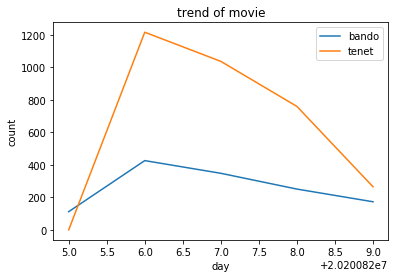

In [85]:

plt.plot(xs,ys2,label='bando')
plt.plot(xs,ys1,label='tenet')
plt.legend()
plt.title("trend of movie")
plt.xlabel("day")
plt.ylabel("count")

plt.show()


In [44]:
res=titlePrs('')
col=['key','title','avg','cnt','pos','neg','day']
df=pd.DataFrame(data=res,columns=col)
df.head()


,key,title,avg,cnt,pos,neg,day
0,반도20200825,반도,4.48,112,None,None,20200825
1,강철비2:정상회담20200825,강철비2: 정상회담,4.60,40,None,None,20200825
2,다만악에서구하소서20200825,다만 악에서 구하소서,8.15,34,None,None,20200825
3,69세20200825,69세,7.23,13,None,None,20200825
4,블라인드사이드20200825,블라인드 사이드,9.91,11,None,None,20200825


In [87]:
v1= df['title']=='테넷'
v2= df['title']=='반도'
tgtdf=df[v1|v2 ].sort_values(by=['title','day'])
tgtdf=tgtdf[['title','cnt','day']]
tgtdf.head(10)

,title,cnt,day
0,반도,112,20200825
191,반도,426,20200826
858,반도,348,20200827
1574,반도,251,20200828
2240,반도,173,20200829
190,테넷,1215,20200826
857,테넷,1036,20200827
1573,테넷,759,20200828
2239,테넷,265,20200829


,title,cnt,day
0,반도,112,20200825
191,반도,426,20200826
858,반도,348,20200827
1574,반도,251,20200828
2240,반도,173,20200829
190,테넷,1215,20200826
857,테넷,1036,20200827
1573,테넷,759,20200828
2239,테넷,265,20200829


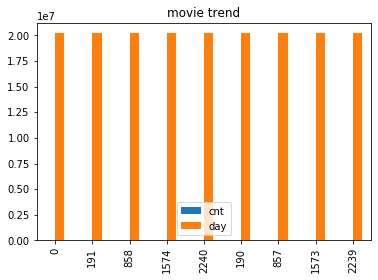

In [60]:

tgtdf.plot.bar()
plt.title('movie trend')
tgtdf.tail(10)